# 주제: 셀프주유소는 정말로 저렴할까?

# Selenium

버튼을 눌러도 웹브라우저상의 주소가 바뀌지 않는다.

접근주소가 없으면 BeautifulSoup에서는 처리할 수 없다.

Selenium은 접근주소가 없어도 처리할 수있도록 되어있다.

셀프주유소가 정말 저렴할지 확인한다.<br><br>

# 1. Selenium사용하기

In [1]:
!pip install selenium

구글 크롬을 대상으로하고 있어서 크롬 웹드라이버를 다운받아야한다.

자신의 운영체제에 맞춰서 다운로드를 한다. 본인은 Windows10이다.

다운로드한 Chrome Driver 버젼은 ChromeDriver 76 이다.(chromedriver_win32.zip)

현재 자신이 사용하고 있는 크롬브라우저의 버젼에 맞춰서 다운로드하는게 좋다.(본인은 76버젼이다.)

현재 소스코드와 동일한 위치(디렉토리)에 저장하고 압축을 해제한다.

본인은 현재 이 노트(ipynb)파일과 같은 위치에 driver 폴더(디렉토리)를 새로생성했고

driver 폴더에 chromedriver.exe 파일을 저장했다.

## Selenium 테스트 - 네이버 홈페이지 - 동적인 웹에서 처리해보기

selenium에 의해 열려진 크롬화면은 'Chrome이 자동화된 테스트 소프트웨어에 의해 제어되고 있습니다'라는 문구가 나온다.

이때 이용자(사람)이 수동적으로 조작을하면 혼선이 생길 수있으므로

동일한 창(selenium에 의해서가 아닌 사용자가 직접 인터넷을 켬)을 실행시켜서

개발자 도구를 이용하여 추출한 데이터의 위치가 어디인지를 확인한다.

In [3]:
from selenium import webdriver
driver= webdriver.Chrome('./driver/chromedriver.exe')
driver.get('http://naver.com')

In [5]:
# selenium에 의해 열린 크롬화면을 캡처
driver.save_screenshot('./images/001.jpg')

True

## 네이버 로그인해보기 실습

## NAVER 로그인 버튼 누르기

개발자 도구에서 'NAVER 로그인'버튼에 해당하는 HTML코드 부분을 선택후

오른쪽 마우스를 눌러서 Copy > Copy Xpath 

In [6]:
## "Naver 로그인" 버튼을 눌러야 로그인 창이 뜬다.
xpath='''//*[@id="account"]/div/a/i'''
driver.find_element_by_xpath(xpath).click()

## 실행결과 클릭이 이루어졌고 로그인 화면으로 이동했다.

In [7]:
# <아이디 비밀번호 입력>
input_id= driver.find_element_by_id('id') #id='id'인 태그를 찾는다.

# 어떤 글자가 입력되어있을 때 clear() 명령으로 id입력위치한 기존 입력내용을 지운다.
input_id.clear() 

# 아이디를 입력한다.
input_id.send_keys('당신의 네이버 아이디')

# id='pw'인 태그를 찾는다.
input_pw= driver.find_element_by_id('pw')

# 어떤글자가 입력되어있다면 지워놓는다.
input_pw.clear()

# 비밀번호를 입력한다.
input_pw.send_keys('당신의 네이버 비밀번호')

# 로그인 버튼을 누른다.
xpath='''//*[@id="frmNIDLogin"]/fieldset/input'''
driver.find_element_by_xpath(xpath).click()

In [8]:
# 예전과 달리 요즘은 자동입력에 대한 보안이 강하다...
driver.save_screenshot('./images/secure.jpg')

True

계속끝없이 자동입력 방지 문자만 뜬다...ㅠ
    
로그인은 실패했지만 그래도 클릭해서 화면 넘어가는 단계까지만해도 반만 성공한걸로 생각한다.

이제야 셀레니움을 쓸 수있을거같아서 못했던 셀레니움 프로젝트를 마무리 해야될거같다!

In [10]:
# 비밀번호 재입력
input_pw= driver.find_element_by_id('pw') #id=pw인 태그 찾기
input_pw.clear()#기존 입력내용 지우기
input_pw.send_keys('비밀번호입력') #비번입력

#자동입력 방지 문자
input_secure_code= driver.find_element_by_id('chptcha')#i id=chptcha 인 태그 찾기
input_secure_code.clear()#기존입력내용 지우기
input_secure_code.send_keys('보안키 입력') #보안키 입력

#로그인 버튼 누르기
xpath='''//*[@id="frmNIDLogin"]/fieldset/input'''
driver.find_element_by_xpath(xpath).click()


<br><br>

#  (예제) 서울시 구별 주유소 가격 정보 얻기

In [41]:
from selenium import webdriver
driver=webdriver.Chrome('./driver/chromedriver.exe') #웹드라이버 실행
driver.get('http://www.opinet.co.kr/searRgSelect.do') # opinet 페이지 불러오기
# 그러나 url에 있는 원하는 페이지를 복사해봤지만
# 실제로는 메인페이지로 다시 돌아왔다.

In [44]:
# 1. 주유소/충전소 찾기 버튼클릭
## 주유소/ 충전소 찾기 버튼에 해당하는 버튼의 xpath를 복사
xpath='''//*[@id="gnb"]/ul/li[1]/a'''
driver.find_element_by_xpath(xpath).click() #클릭


In [ ]:
# 2. 지역별 버튼 클릭
# 지역별 태그 찾기=> xpath복사
xpath='''//*[@id="gnb_0_0"]/a'''
click_local= driver.find_element_by_xpath(xpath).click() #클릭

In [45]:
# 클릭하면 목표하는 화면과 일치한다. (성공화면 스크린샷)
driver.save_screenshot('./images/success_opinet_navigation.jpg')

C:\Users\USER\Anaconda3\lib\site-packages\selenium\webdriver\remote\webdriver.py:1031: UserWarning: name used for saved screenshot does not match file type. It should end with a `.png` extension
  "type. It should end with a `.png` extension", UserWarning)


True

## (1) 서울에 있는 모든 구 에 해당하는 지역정보를 추출한다.

왼쪽 지역에서 (구) 에 해당하는 부분의 개발자도구를 이용하여 태그를 찾는다.

찾았다면 xpath를 복사하여 붙여넣는다.

그리고 그 안에는 option 태그에 구 에 해당하는 지역이름이 전부 있다.

In [46]:
gu_list_raw= driver.find_element_by_xpath('''//*[@id="SIGUNGU_NM0"]''')
gu_list= gu_list_raw.find_elements_by_tag_name('option')
print('gu_list 출력\n', gu_list)

gu_list 출력
 [<selenium.webdriver.remote.webelement.WebElement (session="54ea92266e42291d1e11e1dde0bf430d", element="22e3b331-f3fa-4e3a-970d-af29134546c9")>, <selenium.webdriver.remote.webelement.WebElement (session="54ea92266e42291d1e11e1dde0bf430d", element="58da3764-871d-4f23-8e39-96eacb1f3e68")>, <selenium.webdriver.remote.webelement.WebElement (session="54ea92266e42291d1e11e1dde0bf430d", element="9236bf34-a392-4861-bb55-1ebd23f39959")>, <selenium.webdriver.remote.webelement.WebElement (session="54ea92266e42291d1e11e1dde0bf430d", element="12457a40-7b8f-4898-a442-b55e5cf4b8f5")>, <selenium.webdriver.remote.webelement.WebElement (session="54ea92266e42291d1e11e1dde0bf430d", element="5442ceff-fec6-4090-a22a-a9d79ab4d7e6")>, <selenium.webdriver.remote.webelement.WebElement (session="54ea92266e42291d1e11e1dde0bf430d", element="1c7560bf-bdab-4eaa-8fdb-0909f57f7535")>, <selenium.webdriver.remote.webelement.WebElement (session="54ea92266e42291d1e11e1dde0bf430d", element="18c9099e-7052-4fb3-9

In [47]:
gu_names= [option.get_attribute('value') for option in gu_list ]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

<br><br>

## (2) 서울시 구별 execl 파일 저장하기

In [48]:
# 맨위의 강남구를 시험삼아서 입력해보기
element= driver.find_element_by_id('SIGUNGU_NM0')
element.send_keys(gu_names[0]) # (구)옵션에서 강남구를 선택

# 조회버튼을 안눌러도 자동으로 바뀐다..!

In [49]:
# 강남구 선택한거 스크린샷
driver.save_screenshot('./images/auto_input_gangnamgu.jpg')

C:\Users\USER\Anaconda3\lib\site-packages\selenium\webdriver\remote\webdriver.py:1031: UserWarning: name used for saved screenshot does not match file type. It should end with a `.png` extension
  "type. It should end with a `.png` extension", UserWarning)


True

In [50]:
# 엑셀저장 버튼 누르기
xpath= '''//*[@id="glopopd_excel"]'''
element_get_excel= driver.find_element_by_xpath(xpath).click()
# 기본 다운로드 위치는 '다운로드(Download)' 디렉토리에 있다.
# 이건 시범삼아 해본 것이므로 다운받은 파일은 삭제할것.

In [51]:
import time
from tqdm import tqdm_notebook # 이 커널셀의 진행률을 시각적으로 보여줌

# 구이름별로 실행해서 각 구마다의 excel파일을 저장한다.
for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id('SIGUNGU_NM0') # id가 SIGUNGU_NM0 인 태그를 찾는다.(구 옵션을 찾는다.)
    element.send_keys(gu) # 구 옵션에 gu 에 해당하는 지역값을 넣는다.
    time.sleep(2) #2초 쉬어준다. (지도가 바뀌는 것을 고려) 
    
    # excel파일을 클릭
    xpath= '''//*[@id="glopopd_excel"]''' # excel 다운로드 버튼에 해당하는 xpath를 찾는다.
    element_get_excel= driver.find_element_by_xpath(xpath).click() # xpath를 실행...(excel다운로드 버튼을 클릭)
    time.sleep(1) #1초 쉬어준다 (다운로드 걸리는 시간 고려)

excel 파일이 다운로드됐다면 현재 jupyter notebook 파일(ipynb)와 동일한 디렉토리에 다운받은 excel파일을 저장.<br><br>

<br><br>
## (3) 구별 주유 가격에 대한 데이터 정리

stations_files 변수에 각 엑셀 파일의 경로와 이름을 리스트로 저장한다.

In [53]:
import pandas as pd
from glob import glob

stations_files=glob('./excels_seoul/지역*.xls') #앞글자가 '지역'이 들어있고 *.xls 형식의 파일이면 업로드
stations_files

['./excels_seoul\\지역_위치별(주유소) (1).xls',
 './excels_seoul\\지역_위치별(주유소) (10).xls',
 './excels_seoul\\지역_위치별(주유소) (11).xls',
 './excels_seoul\\지역_위치별(주유소) (12).xls',
 './excels_seoul\\지역_위치별(주유소) (13).xls',
 './excels_seoul\\지역_위치별(주유소) (14).xls',
 './excels_seoul\\지역_위치별(주유소) (15).xls',
 './excels_seoul\\지역_위치별(주유소) (16).xls',
 './excels_seoul\\지역_위치별(주유소) (17).xls',
 './excels_seoul\\지역_위치별(주유소) (18).xls',
 './excels_seoul\\지역_위치별(주유소) (19).xls',
 './excels_seoul\\지역_위치별(주유소) (2).xls',
 './excels_seoul\\지역_위치별(주유소) (20).xls',
 './excels_seoul\\지역_위치별(주유소) (21).xls',
 './excels_seoul\\지역_위치별(주유소) (22).xls',
 './excels_seoul\\지역_위치별(주유소) (23).xls',
 './excels_seoul\\지역_위치별(주유소) (24).xls',
 './excels_seoul\\지역_위치별(주유소) (3).xls',
 './excels_seoul\\지역_위치별(주유소) (4).xls',
 './excels_seoul\\지역_위치별(주유소) (5).xls',
 './excels_seoul\\지역_위치별(주유소) (6).xls',
 './excels_seoul\\지역_위치별(주유소) (7).xls',
 './excels_seoul\\지역_위치별(주유소) (8).xls',
 './excels_seoul\\지역_위치별(주유소) (9).xls',
 './excels_seoul\\지역_위치별(

In [54]:
tmp_raw=[]

for file_name in stations_files:
    # excel파일을 읽는다.
    tmp= pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

# 25개의 엑셀파일을 하나로 합친다.
station_raw= pd.concat(tmp_raw)

In [55]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1546,1397,-
1,서울특별시,천호현대주유소,서울 강동구 천중로 67 (천호동),현대오일뱅크,02-484-9323,N,-,1557,1417,1200
2,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,1576,1399,-
3,서울특별시,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1779,1579,1442,1100
4,서울특별시,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),S-OIL,02-484-1162,Y,-,1588,1448,-


In [56]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 41
Data columns (total 10 columns):
지역       505 non-null object
상호       505 non-null object
주소       505 non-null object
상표       505 non-null object
전화번호     505 non-null object
셀프여부     505 non-null object
고급휘발유    505 non-null object
휘발유      505 non-null object
경유       505 non-null object
실내등유     505 non-null object
dtypes: object(10)
memory usage: 43.4+ KB


In [57]:
stations= pd.DataFrame({'Oil_Store': station_raw['상호'],
                        '주소':station_raw['주소'],
                        '가격':station_raw['휘발유'],
                        '셀프':station_raw['셀프여부'],
                        '상표':station_raw['상표']})
stations.head()

,Oil_Store,주소,가격,셀프,상표
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1546,N,현대오일뱅크
1,천호현대주유소,서울 강동구 천중로 67 (천호동),1557,N,현대오일뱅크
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1576,Y,GS칼텍스
3,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1579,N,GS칼텍스
4,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1588,Y,S-OIL


In [60]:
stations['구']= [ eachAddress.split()[1] for eachAddress in stations['주소'] ]
stations.head()

,Oil_Store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1546,N,현대오일뱅크,강동구
1,천호현대주유소,서울 강동구 천중로 67 (천호동),1557,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1576,Y,GS칼텍스,강동구
3,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1579,N,GS칼텍스,강동구
4,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1588,Y,S-OIL,강동구


In [61]:
# 구 컬럼 unique()
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [65]:
stations['가격'].unique()

array([1546, 1557, 1576, 1579, 1588, 1593, 1598, 1599, 1619, 1629, 1638,
       1648, 1698, 1983, 1485, 1492, 1495, 1505, 1514, 1528, 1537, 1539,
       1549, 1568, 1649, 1655, 1688, 1551, 1555, 1559, 1565, 1569, 1575,
       1635, 1645, '1595', '1598', '1617', '1628', '1697', '1699', '1829',
       '1840', '1848', '1929', '1939', '-', '1534', '1541', '1547',
       '1559', '1568', '1582', '1589', '1698', '1999', 1506, 1540, 1545,
       1553, 1558, 1563, 1584, 1586, 1590, 1594, 1595, 1642, 1647, 1659,
       1669, 1745, 1968, 1978, 1993, 1999, '1499', '1515', '1538', '1558',
       '1588', '1594', '1615', '1649', '1695', '1770', '1799', '1898',
       '1474', '1475', '1518', '1519', '1532', '1548', '1569', '1579',
       '1584', '1599', '1629', '2135', 1513, 1519, 1543, 1567, 1572, 1574,
       1577, 1589, 1605, 1678, 1679, 1767, 1799, 1829, '1468', '1487',
       '1488', '1497', '1507', '1509', '1510', '1517', '1554', '1587',
       '1609', '1639', '1653', '1679', '1857', 1478, 1499,

In [66]:
# 가격의 '-'은 예외처리 한다.
# '-' 문자의 의미는 가격이 기록되지 않음을 의미한다.
stations[ stations['가격']=='-']

,Oil_Store,주소,가격,셀프,상표,구
11,서강주유소,서울 마포구 독막로 134 (창전동),-,N,SK에너지,마포구
12,(주)승지 염리동주유소,서울 마포구 백범로 126 (염리동),-,N,현대오일뱅크,마포구
13,광호주유소,서울 서대문구 연희로 266 (홍은동),-,N,SK에너지,서대문구
14,연희주유소,서울 서대문구 연희로 129 (연희동 89-7번지),-,N,SK에너지,서대문구
16,SK에너지(주) 군자동주유소,서울 성동구 천호대로 446 (용답동),-,N,SK에너지,성동구
21,강산주유소,서울 성북구 보문로 27 (보문동7가),-,N,GS칼텍스,성북구
22,장위주유소,서울 성북구 화랑로 110 (하월곡동),-,N,SK에너지,성북구
23,KR누리(주) 종암주유소,서울 성북구 종암로 145 (종암동),-,N,SK에너지,성북구
24,SK네트웍스(주) SKOK주유소,서울특별시 양천구 안양천로 1179 (목동),-,N,SK에너지,양천구
25,SK네트웍스 신월남부,서울특별시 양천구 남부순환로 553 (신월동),-,Y,SK에너지,양천구


In [67]:
# 가격확인이 안된 위의 주유소는 대상에서 제외시킨다.
stations= stations[ stations['가격']!='-']
stations.head()

,Oil_Store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1546,N,현대오일뱅크,강동구
1,천호현대주유소,서울 강동구 천중로 67 (천호동),1557,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1576,Y,GS칼텍스,강동구
3,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1579,N,GS칼텍스,강동구
4,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1588,Y,S-OIL,강동구


In [74]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 39
Data columns (total 6 columns):
Oil_Store    491 non-null object
주소           491 non-null object
가격           491 non-null object
셀프           491 non-null object
상표           491 non-null object
구            491 non-null object
dtypes: object(6)
memory usage: 36.9+ KB


In [75]:
# 가격은 object이다....
# float타입으로 변경한다.
stations['가격']= [ float(value) for value in stations['가격']]

In [76]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 39
Data columns (total 6 columns):
Oil_Store    491 non-null object
주소           491 non-null object
가격           491 non-null float64
셀프           491 non-null object
상표           491 non-null object
구            491 non-null object
dtypes: float64(1), object(5)
memory usage: 36.9+ KB


In [77]:
stations.reset_index(inplace=True)
del stations['index'] #인덱스 삭제
stations.head()

,Oil_Store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1546.0,N,현대오일뱅크,강동구
1,천호현대주유소,서울 강동구 천중로 67 (천호동),1557.0,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1576.0,Y,GS칼텍스,강동구
3,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1579.0,N,GS칼텍스,강동구
4,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1588.0,Y,S-OIL,강동구


<br><br>

## (4) 셀프 주유소는 정말 저렴한지 boxplot으로 확인하기

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform
from matplotlib import font_manager, rc

path='./malgun.ttf'
if platform.system()=='Darwin':
    rc('font', family='AppleGothic')
    
elif platform.system()=='Windows':
    font_name= font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

else:
    print('[ERROR] Unknown System.')

<br>

## 셀프컬럼을 기준으로 가격분포 확인하기

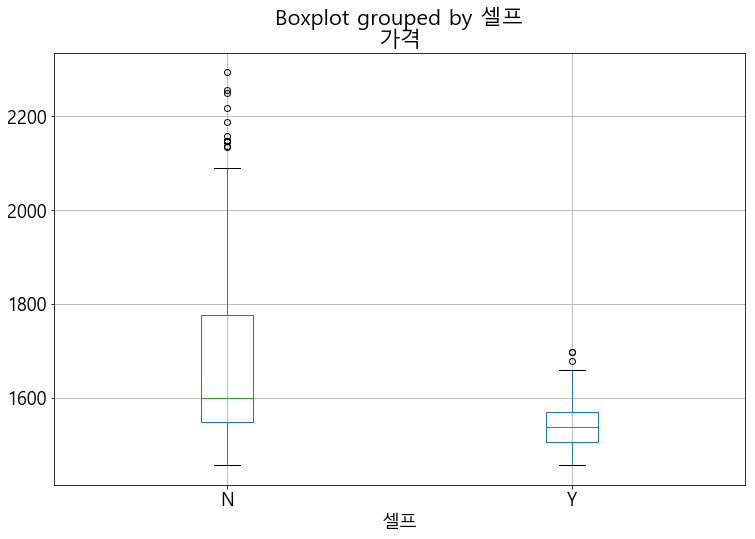

In [83]:
plt.rcParams.update({'font.size':18})
stations.boxplot( column='가격', by='셀프', figsize=(12, 8))

<br>

## 주유소의 상표별로 셀프 주유소가 얼마나 저렴한지 확인 

현대오일뱅크, GS칼텍스, S-Oil, SK에너지 모두 셀프 주유소가 저렴하다.

SK에너지는 가격대가 가장 높게 형성되어 있는것을 알 수 있다.

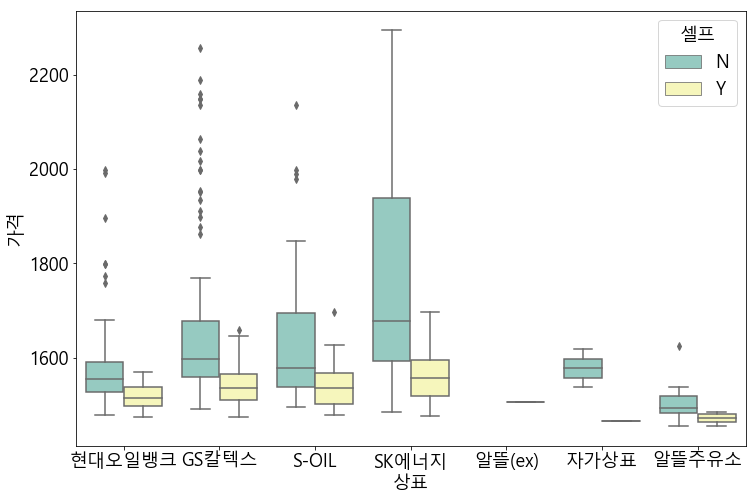

In [85]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.show()

<br>


## Swarmplot으로 데이터 분포를 확인하기


전반적으로 현대 오일뱅크가 4대 주유브랜드 중에서는 가장 저렴하다.

셀프주유소는 대체로 저렴하다.


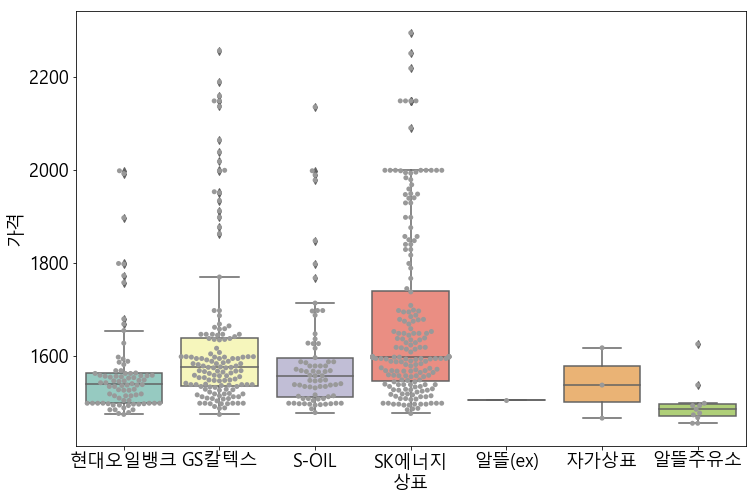

In [87]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', data=stations, palette='Set3')
sns.swarmplot(x='상표', y='가격', data=stations, color='.6')
plt.show()

## (5) 서울시 구별 주유 가격 확인하기

In [88]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [89]:
stations.sort_values(by='가격', ascending=False).head(10)
# 가장 비싼 가격(2294)을 갖는 주유소 : 서남주유소

,Oil_Store,주소,가격,셀프,상표,구
298,서남주유소,서울 중구 통일로 30,2294.0,N,SK에너지,중구
297,SC(주) 역전주유소,서울 중구 퇴계로 15,2256.0,N,GS칼텍스,중구
296,장충주유소,서울 중구 장충단로 202 (장충동1가),2250.0,N,SK에너지,중구
490,뉴서울(강남),서울 강남구 언주로 716 (논현동),2218.0,N,SK에너지,강남구
295,필동주유소,서울 중구 퇴계로 196 (필동2가),2189.0,N,GS칼텍스,중구
294,지에스칼텍스(주)초동주유소,서울 중구 마른내로 31,2159.0,N,GS칼텍스,중구
285,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2148.0,N,GS칼텍스,종로구
292,(주)중앙에너비스 퇴계로지점,서울 중구 퇴계로 228 (필동2가),2148.0,N,SK에너지,중구
259,에너비스,서울 용산구 한남대로 82 (한남동),2148.0,N,SK에너지,용산구
260,한남지점,서울 용산구 한남대로21길 4 (한남동),2148.0,N,SK에너지,용산구


In [91]:
stations.sort_values(by='가격', ascending=True).head(10)
# 가장 싼 가격(1456)을 갖는 주유소: 화곡역주유소

,Oil_Store,주소,가격,셀프,상표,구
315,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1456.0,Y,알뜰주유소,강서구
316,뉴신정주유소,서울특별시 강서구 곰달래로39길 10 (화곡동),1456.0,N,알뜰주유소,강서구
261,이케이에너지(주)번개주유소,서울 은평구 응암로 163,1467.0,Y,자가상표,은평구
178,양천구주유소,서울 양천구 국회대로 275 (목동),1468.0,Y,알뜰주유소,양천구
125,원천주유소,서울 성북구 돌곶이로 142 (장위동),1474.0,N,알뜰주유소,성북구
127,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1475.0,Y,GS칼텍스,성북구
126,강산제2주유소,서울 성북구 보국문로 52,1475.0,Y,현대오일뱅크,성북구
262,타이거주유소,서울 은평구 수색로 188 (증산동),1477.0,Y,SK에너지,은평구
263,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1477.0,Y,현대오일뱅크,은평구
202,도림주유소,서울 영등포구 도림로 343 (도림동),1478.0,Y,알뜰주유소,영등포구


In [92]:
import numpy as np
gu_data= pd.pivot_table( stations, index=['구'], values=['가격'], aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1767.800000
강동구,1629.250000
강북구,1507.076923
강서구,1546.235294
관악구,1581.000000


In [94]:
geo_path='./skorea_municipalities_geo_simple.json'
geo_data= json.load(open(geo_path, encoding='utf-8'))

map= folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='Stamen Toner')

map.choropleth(geo_data = geo_data,
              data= gu_data,
              columns=[gu_data.index, '가격'],
              fill_color='YlGnBu',
              key_on='feature.id')
map

<br><br>

## (6) 서울시 주유가격 상하위 10개 주유소 지도에 표시하기

In [96]:
oil_price_top10= stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_Store,주소,가격,셀프,상표,구
298,서남주유소,서울 중구 통일로 30,2294.0,N,SK에너지,중구
297,SC(주) 역전주유소,서울 중구 퇴계로 15,2256.0,N,GS칼텍스,중구
296,장충주유소,서울 중구 장충단로 202 (장충동1가),2250.0,N,SK에너지,중구
490,뉴서울(강남),서울 강남구 언주로 716 (논현동),2218.0,N,SK에너지,강남구
295,필동주유소,서울 중구 퇴계로 196 (필동2가),2189.0,N,GS칼텍스,중구
294,지에스칼텍스(주)초동주유소,서울 중구 마른내로 31,2159.0,N,GS칼텍스,중구
285,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2148.0,N,GS칼텍스,종로구
292,(주)중앙에너비스 퇴계로지점,서울 중구 퇴계로 228 (필동2가),2148.0,N,SK에너지,중구
259,에너비스,서울 용산구 한남대로 82 (한남동),2148.0,N,SK에너지,용산구
260,한남지점,서울 용산구 한남대로21길 4 (한남동),2148.0,N,SK에너지,용산구


In [97]:
oil_price_bottom10= stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_Store,주소,가격,셀프,상표,구
315,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1456.0,Y,알뜰주유소,강서구
316,뉴신정주유소,서울특별시 강서구 곰달래로39길 10 (화곡동),1456.0,N,알뜰주유소,강서구
261,이케이에너지(주)번개주유소,서울 은평구 응암로 163,1467.0,Y,자가상표,은평구
178,양천구주유소,서울 양천구 국회대로 275 (목동),1468.0,Y,알뜰주유소,양천구
125,원천주유소,서울 성북구 돌곶이로 142 (장위동),1474.0,N,알뜰주유소,성북구
127,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1475.0,Y,GS칼텍스,성북구
126,강산제2주유소,서울 성북구 보국문로 52,1475.0,Y,현대오일뱅크,성북구
262,타이거주유소,서울 은평구 수색로 188 (증산동),1477.0,Y,SK에너지,은평구
263,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1477.0,Y,현대오일뱅크,은평구
202,도림주유소,서울 영등포구 도림로 343 (도림동),1478.0,Y,알뜰주유소,영등포구


In [98]:
gmap_key='구글맵 api 키'
gmaps= googlemaps.Client(key=gmap_key)

In [101]:
from tqdm import tqdm_notebook

def get_lat_lng(df):
    lat, lng=[],[]
    for n in tqdm_notebook( df.index):
        try:
            tmp_add = str(df['주소'][n]).split('(')[0]
            tmp_map= gmaps.geocode(tmp_add)

            tmp_loc= tmp_map[0].get('geometry')
            lat.append(tmp_loc['location']['lat'])
            lng.append(tmp_loc['location']['lng'])

        except:
            lat.append(np.nan)
            lng.append(np.nan)
            print('Here is nan!')
        
    df['lat']=lat
    df['lng']=lng
    return df

oil_price_top10=get_lat_lng(oil_price_top10)
oil_price_top10

,Oil_Store,주소,가격,셀프,상표,구,lat,lng
298,서남주유소,서울 중구 통일로 30,2294.0,N,SK에너지,중구,37.558348,126.972090
297,SC(주) 역전주유소,서울 중구 퇴계로 15,2256.0,N,GS칼텍스,중구,37.557001,126.974495
296,장충주유소,서울 중구 장충단로 202 (장충동1가),2250.0,N,SK에너지,중구,37.562719,127.007010
490,뉴서울(강남),서울 강남구 언주로 716 (논현동),2218.0,N,SK에너지,강남구,37.517636,127.035756
295,필동주유소,서울 중구 퇴계로 196 (필동2가),2189.0,N,GS칼텍스,중구,37.560850,126.993653
294,지에스칼텍스(주)초동주유소,서울 중구 마른내로 31,2159.0,N,GS칼텍스,중구,37.564944,126.991136
285,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2148.0,N,GS칼텍스,종로구,37.574464,126.966618
292,(주)중앙에너비스 퇴계로지점,서울 중구 퇴계로 228 (필동2가),2148.0,N,SK에너지,중구,37.561648,126.997142
259,에너비스,서울 용산구 한남대로 82 (한남동),2148.0,N,SK에너지,용산구,37.535952,127.006130
260,한남지점,서울 용산구 한남대로21길 4 (한남동),2148.0,N,SK에너지,용산구,37.534657,127.006063


In [102]:
oil_price_bottom10=get_lat_lng(oil_price_bottom10)
oil_price_bottom10

,Oil_Store,주소,가격,셀프,상표,구,lat,lng
315,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1456.0,Y,알뜰주유소,강서구,37.540657,126.841506
316,뉴신정주유소,서울특별시 강서구 곰달래로39길 10 (화곡동),1456.0,N,알뜰주유소,강서구,37.531820,126.855564
261,이케이에너지(주)번개주유소,서울 은평구 응암로 163,1467.0,Y,자가상표,은평구,37.586704,126.915896
178,양천구주유소,서울 양천구 국회대로 275 (목동),1468.0,Y,알뜰주유소,양천구,37.530283,126.865529
125,원천주유소,서울 성북구 돌곶이로 142 (장위동),1474.0,N,알뜰주유소,성북구,37.614921,127.052752
127,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1475.0,Y,GS칼텍스,성북구,37.607660,127.009858
126,강산제2주유소,서울 성북구 보국문로 52,1475.0,Y,현대오일뱅크,성북구,37.609163,127.010074
262,타이거주유소,서울 은평구 수색로 188 (증산동),1477.0,Y,SK에너지,은평구,37.578424,126.902050
263,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1477.0,Y,현대오일뱅크,은평구,37.581122,126.897774
202,도림주유소,서울 영등포구 도림로 343 (도림동),1478.0,Y,알뜰주유소,영등포구,37.507656,126.900191


In [104]:
def draw_map(df, map, color):
    for n in df.index:
        if pd.notnull(df['lat'][n]):
            folium.CircleMarker([df['lat'][n], df['lng'][n]],
                            radius=15, color=color, fill_color=color).add_to(map)

            
map= folium.Map(location=[37.5202, 126.975], zoom_start=10.5)
draw_map(oil_price_top10, map,'#CD3181' )
draw_map(oil_price_bottom10, map,'#3186cc' )

map